# 20_titanic

### **문제 정의**
- 타이타닉: 데이터를 이용하여 생존자 예측하기

### **데이터 불러오기**
- train: 학습용 데이터
- test: 검증용 데이터

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 실습하기. train과 test 변수에 각 데이터를 불러와주세요.
test = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/test.csv')
train = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/train.csv')

### **Data Explore**
- 데이터 살펴보기

In [ ]:
print('학습 테이더', train.shape)
print('테스트 데이터', test.shape)

학습 테이더 (891, 12)
테스트 데이터 (418, 11)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **실습하기.**
- 전체 생존율 구하기
- 생존자의 총 수, 사망자 수를 구해주세요

In [ ]:
train.Survived.mean()
train.Survived.mean() * 100
rate = train.Survived.mean() * 100
f"{rate:.1f}%"

'38.4%'

In [ ]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# 성별에 따른 생존 확인하기
train.Sex.value_counts()
train.loc[train.Survived == 0, 'Sex'].value_counts()
train.loc[train.Survived == 1, 'Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [ ]:
import seaborn as sns
from matplotlib import pyplot as pyplot

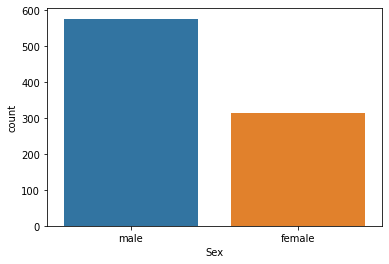

In [ ]:
# 성별에 따른 분류
sns.countplot(data = train, x = 'Sex')

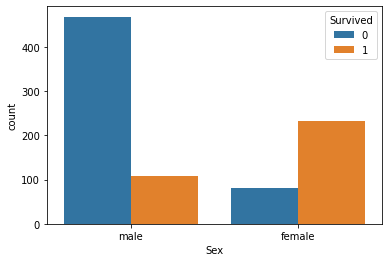

In [ ]:
# 성별에 따른 분류에 생존율을 같이 시각화하기
sns.countplot(data = train, x = 'Sex', hue = 'Survived') # 0: 사망, 1: 생존

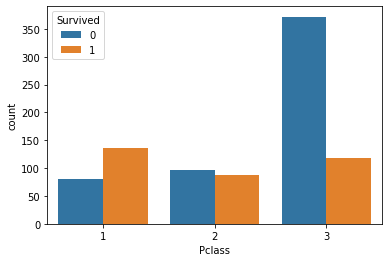

In [ ]:
# 클래스에 따른 시각화
# - 3등급일수록 배의 구조상 아래층에 위치하고
# - 1등급일수록 배의 구조상 감판과 가까움
# - 1등급이 3등급보다 비쌈
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

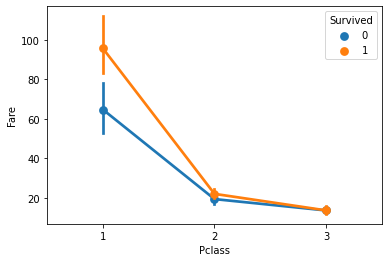

In [ ]:
# 클래스에 따른 시각화에 비용을 포함
sns.pointplot(data = train, x = 'Pclass', y = 'Fare', hue = 'Survived')

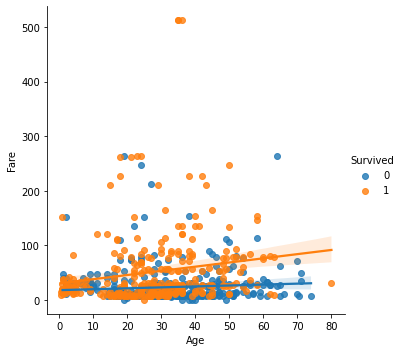

In [ ]:
# 비용과 나이에 따른 분포
sns.lmplot(data = train, x = 'Age', y = 'Fare', hue = 'Survived')

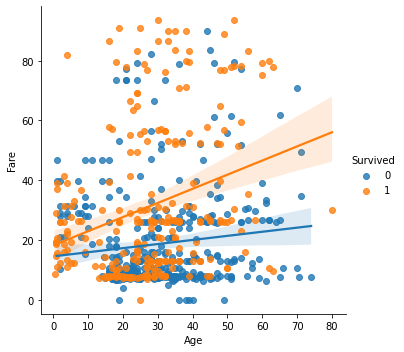

In [ ]:
# 고가의 티켓 몇 개로 인하여 데이터를 분석해야하는 구간이 시각화시에
# 잘 안 보이므로 비용을 줄이기
train.Fare <= 100
low_fare = train.loc[train.Fare <= 100, :]
low_fare


sns.lmplot(data = low_fare, x = 'Age', y = 'Fare', hue = 'Survived')

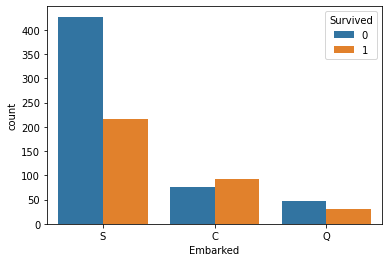

In [ ]:
# 탑승자에 따른 분류
# S: 영국의 사우샘프턴
# C: 프랑스의 세르부르
# Q: 아일랜드 퀸스타운
train.Embarked.value_counts()

sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

# **data PreProcessing**
- 데이터 전처리
- 데이터 가공하고, 결측치 가공, Tidy(잡동사니), noise 제거

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 필요없는 데이터 삭제
train.drop(['Cabin', 'Ticket'], axis = 1, inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [ ]:
# test에서도 삭제하기
test.drop(['Cabin', 'Ticket'], axis = 1, inplace = True)

### **결측치 채우기**

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train.Embarked.fillna('S', inplace = True)
train.Embarked.value_counts().sum()

891

### **실습하기.**
- test 테이터의 결측치 채우기

In [ ]:
test.Fare.fillna(0, inplace = True)

### **문자형 데이터를 숫자형으로 변경하기**
- 성별
- 탑승지

In [ ]:
참 if 조건 else 거짓
참 if 조건 else (참 if 조건 else 거짓)

2 if x == 'C' else (1 if x == 'S' else 3)

In [ ]:
train['Embarked_g'] = train.Embarked.apply(lambda x: 2 if x == 'C' else (1 if x == 'S' else 3))

In [ ]:
test['Embarked_g'] = test.Embarked.apply(lambda x: 2 if x == 'C' else (1 if x == 'S' else 3))

### **Feature Engineering**
- 특성으로부터 특성 도출

In [ ]:
train['is_solo'] = (train.SibSp + train.Parch) == 0

In [ ]:
test['is_solo'] = (test.SibSp + test.Parch) == 0

### **모델 설계 및 학습**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Embarked_g   891 non-null    int64  
 11  is_solo      891 non-null    bool   
dtypes: bool(1), float64(2), int64(6), object(3)
memory usage: 77.6+ KB


In [ ]:
feature_names = ['Pclass', 'Fare', 'Embarked_g', 'is_solo']

In [ ]:
x_train = train[feature_names]

In [ ]:
x_test = test[feature_names]

In [ ]:
y_train = train.loc[:, 'Survived']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 모델 학습하기
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# 모델 예측
predictions = model.predict(x_test)

In [ ]:
predictions

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# 정확도 측정하기
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, x_train, y_train, cv = 20).mean()

In [ ]:
score

0.714191919191919